## Test de Kolmogorov-Smirnov

C'est un test très performant pour savoir si un échantillon
suit une loi donnée (par exemple, une loi gaussienne).



In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
np.set_printoptions(linewidth=400,precision=2)

In [2]:
import os
if not os.path.exists("assets_alea"):
    !git clone https://github.com/vincentvigon/assets_alea

Cloning into 'assets_alea'...
remote: Enumerating objects: 68, done.
remote: Total 68 (delta 0), reused 0 (delta 0), pack-reused 68 (from 1)
Receiving objects: 100% (68/68), 4.99 MiB | 11.03 MiB/s, done.
Resolving deltas: 100% (15/15), done.


### Fonction de répartition empirique
Lorsqu'on a un échantillon $X$ de taille $n$, la loi empirique c'est :
$$
    \frac 1  n  \sum_i  \delta_{X_i}
$$  
Ainsi on met des petites masses de dirac partout où tombent les observations.  La fonction de répartition "empirique" c'est la fonction de répartition de la loi empirique, c'est donc une fonction en escalier qui monte de $1/n$ à chaque $X_i$.

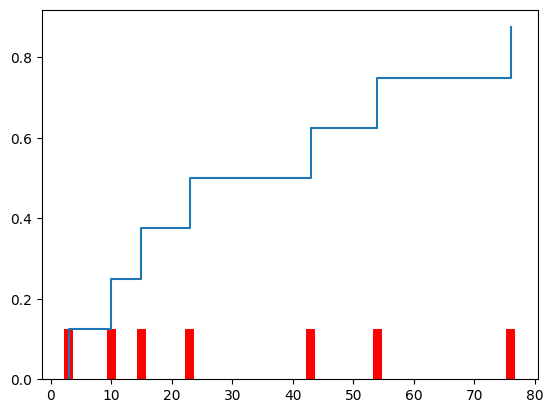

In [3]:
"un échantillon"
X=[10,43,76,15,76,3,23,54]
n=len(X)
fig,ax=plt.subplots()
ax.bar(X,np.ones_like(X)/len(X),width=1.5,color="r")
X_sort=np.sort(X)
"on classe la fonction de répartition empirique"
ax.plot(X_sort,np.arange(n)/n,drawstyle='steps-pre');

#### ♡♡


***A vous:***  Simulez un échantillon de loi exponentielle de taille 100. Superposer la fonction de répartition empirique avec la vrai fonction de répartition de la loi exponentielle.






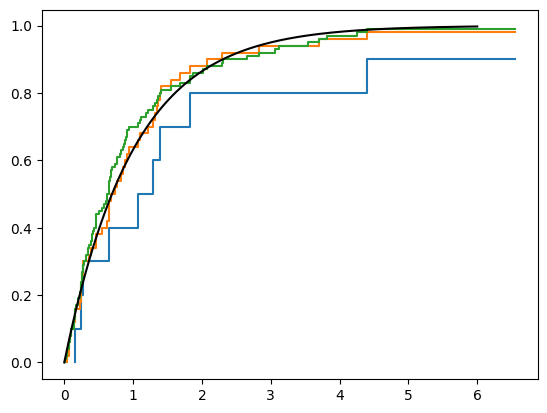

In [13]:
"un échantillon"
ns=[10,50,100]
fig,ax=plt.subplots()
X=np.random.exponential(size=ns[-1])


for n in ns:
    X_sort=np.sort(X[:n])
    "on classe la fonction de répartition empirique"
    ax.plot(X_sort,np.arange(n)/n,drawstyle='steps-pre')

x=np.linspace(0,6,200)
ax.plot(x,1-np.exp(-x),"k");

### Théorème de Glivenko-Cantelli

Soit $X$ un échantillon de taille $n$ et $F_X$ sa fonction de répartition empirique.
Soit $F$ la fonction de répartition de la loi de $X_0$. Le théorème de Glivenko-Cantelli nous indique que quand $n$ tend vers l'infini, $F_X$ tend vers $F$ uniformément (= pour la distance $L_\infty$).



#### ♡♡♡

***A vous:*** Illustrez ce résultat en superposant plusieurs graphiques.


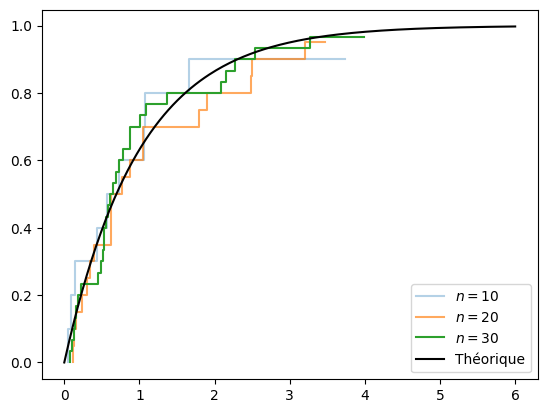

In [ ]:
#--- To keep following outputs, do not run this cell! ---

La distance $L_\infty$ entre $F_X$ et $F$ est
$$
\text{dist}(F_X,F)= \sup_x |F(x) - F_X(x)|
$$

#### ♡♡♡


***A vous:*** Ce supremum ne peut-être atteint qu'en des endroits bien précis. Lesquels? Justifiez.


Aide:  faites un dessin schématique de $F$ et $F_X$ et observez là où ils sont les plus éloignés. Vous en déduirez que la fonction suivante calcule effectivement $\text{dist}(F_X,F)$.




In [14]:
def distance(X,F):
    """remarque : le second argument de cette fonction est une fonction (un callable). """
    N=len(X)
    X_sort=np.sort(X)

    montee1=np.arange(0,N)/N
    montee2=np.arange(1,N+1)/N

    dist1=np.max(np.abs(F(X_sort) - montee1))
    dist2=np.max(np.abs(F(X_sort) - montee2))

    return max(dist1,dist2)

### Vitesse de convergence

Traçons l'évolution de cette distance en fonction de la taille de l'échantillon pour vérifier qu'elle converge vers 0.

In [15]:
n_simu = np.array([10**k for k in range(7)])
max_simu = np.max(n_simu)
distances_unif = []

X_all = stats.expon.rvs(size = max_simu)
for n in n_simu:
    distances_unif.append(distance(X_all[:n], stats.expon.cdf))

distances_unif

[0.6136926538174865,
 0.2352995646001055,
 0.10813558845762394,
 0.04471979315956284,
 0.005816921656035354,
 0.002415447039871177,
 0.0008823826845270055]

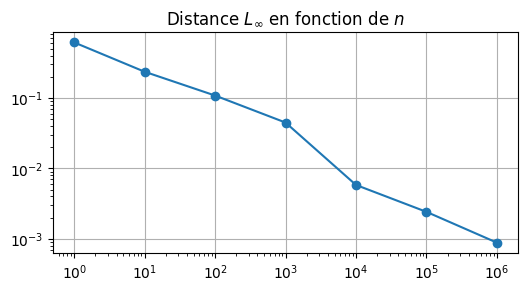

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.set_title(r"Distance $L_\infty$ en fonction de $n$")
ax.set_aspect('equal')
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(n_simu, distances_unif, 'o-')
plt.grid(True);

#### ♡♡


On en déduit que cette distance $L_\infty$ converge vers zéro à la même vitesse que $n\to \color{red}{\square \square \square}$. Cela nous rappelle la vitesse de convergence dans le <font color="red"> □ □ □ </font>.

### Théorème de Kolmogorov-Smirnov $\triangleright$

Le théorème de Glivenko-Cantelli est une sorte de L.F.G.N pour les fonctions de répartition empiriques. Il existe aussi une espèce de T.C.L, c'est le théorème de Kolmogorov-Smirnov:

***Théorème:*** Soit $X$ un échantillon de taille $n$, $F_X$ sa fonction de répartition empirique, et soit $F$ la fonction de répartition de la loi de $X_0$, que nous supposons continue. Quand $n$ tend vers l'infini,  $\sqrt{n}\, \text{dist}(F_X,F)$  converge vers loi vers la loi de Kolmogorov-Smirnov.

La loi de Kolmogorov-Smirnov, c'est la loi dont la fonction de répartition est donnée par
$$
F_{KS} (u) = 1 + 2 \sum_{k>0}  (-1)^k \exp( -2 k^2 u^2 )
$$
Voici un petit programme qui calcule $F_{KS}$.

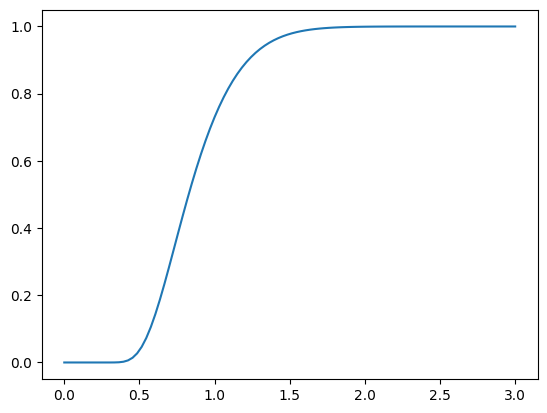

In [17]:
def F_KS(u, precision=1e-15):
    if u<=0: return 0

    sac=0
    elem=1
    k=1
    while elem>precision:
        elem=np.exp(-2*k**2 * u**2)
        sac+=(-1)**k *elem
        k+=1

    return 1+2*sac


"""traçons cette fonction de répartition"""
xs=np.linspace(0,3,100)
ys=[]
for x in xs:
    ys.append(F_KS(x))
plt.plot(xs,ys);

#### ♡♡♡

***À vous:*** En utilisant ce que vous savez sur les séries, expliquez pourquoi le critère d'arrêt que l'on a mis permet effectivement d'atteindre la précision voulue ($2\heartsuit$).




#### ♡♡♡♡

***A vous:*** sauriez-vous  tracer la densité?




In [ ]:
# Procédure pour calculer la densité de KS
def pdf_KS(u, precision=1e-15):


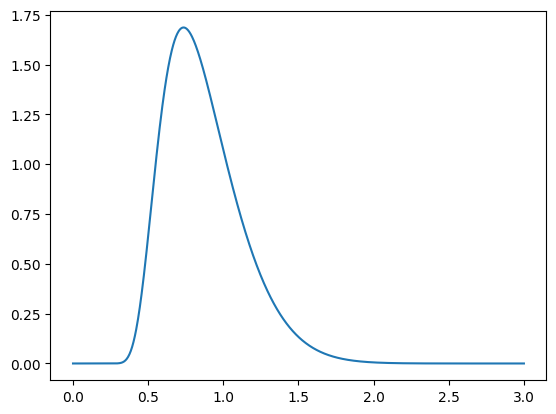

In [ ]:
#--- To keep following outputs, do not run this cell! ---

### Le test lui-même $\triangleright$

Le théorème de Kolmogorov-Smirnov nous permet de construire un test d'adéquation. Considérons deux choses:
* un échantillon $X$
* une fonction de répartition $F$

Considérons les hypothèses suivantes:

* $H_0$:  $X_0$ suit la loi dont la fonction de répartition est $F$
* $H_1$:  ou pas

Analysons ce qu'il peut se passer:

* Sous $H_0$, $\sqrt{n}\, \text{dist}(F_X,F)$ suit une loi de KS. On  peut alors calculer une valeur critique (=un seuil), et aussi une p-valeur.




#### ♡♡


* Sous H1, $F_X$ va converger vers la vraie fonction de répartition de $X_0$, et <font color="red"> □ □ □ </font> Du coup la puissance du test (pour $n$  grand) sera de $1$.


#### ♡♡

Voyons si vous avez compris: complétez le programme ci-dessous ($3\heartsuit$).

In [24]:
"""on génère des données fictives"""

N=10000
data = stats.t(df=20).rvs(size=N)
F=stats.norm.cdf

my_dist = distance(data,F)
my_p_value = 1 - F_KS(np.sqrt(N)*my_dist)


#calcul de my_dist et my_p_value

print("Calculs à la main :")
print("my_dist    :", my_dist)
print("my_p_value :", my_p_value)

Calculs à la main :
my_dist    : 0.010120659684789611
my_p_value : 0.25728963577267794


In [20]:
dist,p_value=stats.kstest(data,stats.norm.cdf,alternative = 'two-sided')
print("\nAvec les fonctions toutes faites :")
print("dist       :",dist)
print("p_value    :",p_value)


Avec les fonctions toutes faites :
dist       : 0.005399291013392926
p_value    : 0.9310168755565825


### Application


Les deux échantillons suivants suivent-ils une loi Normale(0,1)? ($3\heartsuit$)

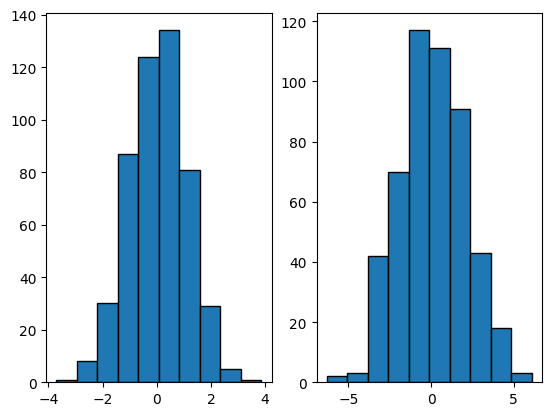

In [25]:
X1=np.loadtxt("assets_alea/dataframe/perhapsNormal1.csv")
X2=np.loadtxt("assets_alea/dataframe/perhapsNormal2.csv")
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.hist(X1,edgecolor="k")
ax2.hist(X2,edgecolor="k");

Rien qu'en normalisant les histogrammes et en traçant la densité de la loi normale centrée réduite on voit venir le résultat.

In [ ]:
#until:#Complétez
x = np.linspace(-4,4,100)
y = stats.norm.pdf(x)

fig,(ax1,ax2)=plt.subplots(1,2)
bins = np.arange(-4,4.1,0.5)

ax1.hist(X1, bins=bins, edgecolor="k", density=True)
ax1.plot(x, y)

ax2.hist(X2, bins=bins, edgecolor="k", density=True)
ax2.plot(x, y)

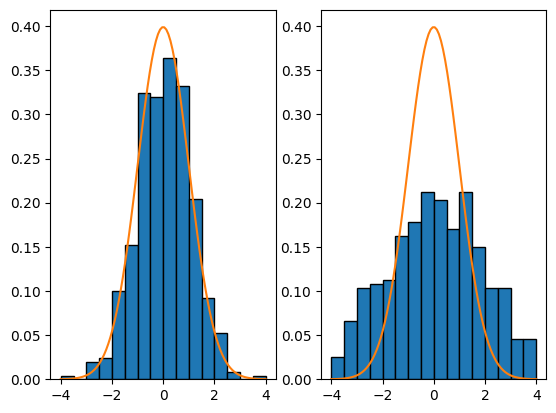

In [ ]:
#--- To keep following outputs, do not run this cell! ---

Mais faire un test statistique c'est plus classe:


In [ ]:
#until:#Complétez
dist1 = distance(X1, stats.norm.cdf)
p_value1 = 1 - F_KS(np.sqrt(len(X1)) * dist1)
print("Échantillon 1 : p_value = ", p_value1)

dist2 = distance(X2, stats.norm.cdf)
p_value2 = 1 - F_KS(np.sqrt(len(X2)) * dist2)
print("Échantillon 2 : p_value = ", p_value2)

In [ ]:
#--- To keep following outputs, do not run this cell! ---

Échantillon 1 : p_value =  0.2043801652511673
Échantillon 2 : p_value =  2.220446049250313e-16



*  l'échantillon 1 suit une $\mathcal N (0,1)$ (`p_value` > 0.05)
*  l'échantillon 2 non (`p_value` << 1).

### Condition d'application du test de KS

Le test de KS ne fonctionne pas pour des lois qui chargent les points (il faudrait l'adapter). À quel endroit est-ce écrit précédemment $(1\heartsuit)$?

Pour la culture: `stats.ks_2samp(data1,data2)` permet de faire un test pour savoir si data1 et data2 ont même loi à partir de la distance entre les deux fonctions de répartition empiriques (cf. wikipedia pour le détail du test).